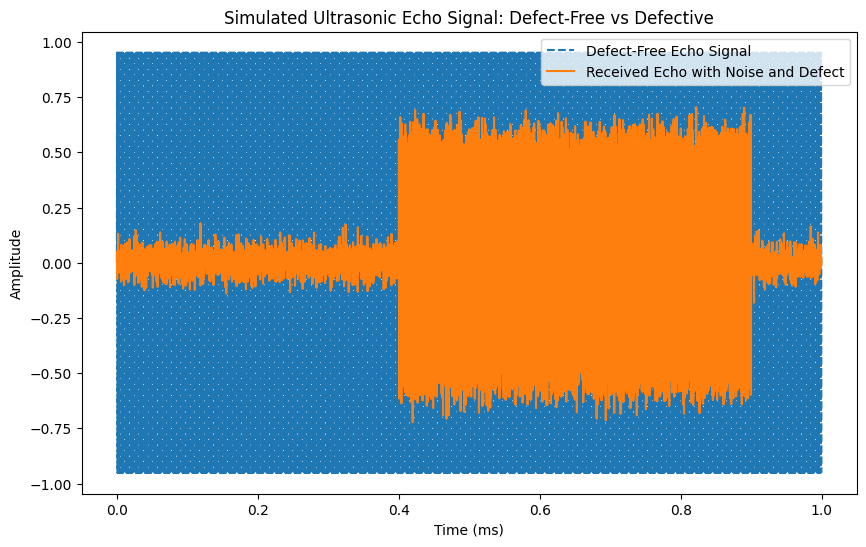

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
sampling_rate = 5e6  # 5 MHz sampling rate
duration = 1e-3  # 1 millisecond
t = np.arange(0, duration, 1/sampling_rate)  # Time array

# Simulate a defect-free sine wave pulse (transmitted signal)
frequency = 1e6  # 1 MHz frequency
pulse = np.sin(2 * np.pi * frequency * t)

# Create an echo signal with a delay (defective signal)
echo_delay = int(0.0004 * sampling_rate)  # Delay of 0.4 ms
echo_amplitude = 0.6  # Attenuated echo
echo_signal = np.zeros_like(t)
echo_signal[echo_delay:echo_delay+len(pulse)//2] = echo_amplitude * pulse[:len(pulse)//2]

# Add noise to the defective signal (simulating a real environment)
noise = 0.05 * np.random.normal(size=t.shape)
received_signal = echo_signal + noise

# Plot the defect-free and defective signals
plt.figure(figsize=(10, 6))
plt.plot(t * 1e3, pulse, '--', label='Defect-Free Echo Signal')
plt.plot(t * 1e3, received_signal, label='Received Echo with Noise and Defect')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Simulated Ultrasonic Echo Signal: Defect-Free vs Defective')
plt.legend()
plt.show()


In [3]:
from scipy.fft import fft
from scipy.stats import skew, kurtosis

# Feature extraction function
def extract_features(signal, sampling_rate):
    # Time-domain features
    max_amplitude = np.max(np.abs(signal))
    rms_value = np.sqrt(np.mean(signal**2))
    
    # FFT for frequency-domain features
    N = len(signal)
    fft_result = fft(signal)
    freqs = np.fft.fftfreq(N, 1/sampling_rate)
    fft_magnitude = np.abs(fft_result)
    
    # Dominant frequency
    dominant_freq = freqs[np.argmax(fft_magnitude[:N//2])]
    
    # Statistical features
    mean_val = np.mean(signal)
    variance_val = np.var(signal)
    skewness_val = skew(signal)
    kurtosis_val = kurtosis(signal)
    
    return {
        'Max Amplitude': max_amplitude,
        'RMS': rms_value,
        'Dominant Frequency': dominant_freq,
        'Mean': mean_val,
        'Variance': variance_val,
        'Skewness': skewness_val,
        'Kurtosis': kurtosis_val
    }

# Extract features from both defect-free and defective signals
defect_free_features = extract_features(pulse, sampling_rate)
defective_features = extract_features(received_signal, sampling_rate)

print("Defect-Free Signal Features:")
print(defect_free_features)
print("\nDefective Signal Features:")
print(defective_features)


Defect-Free Signal Features:
{'Max Amplitude': 0.9510565162955882, 'RMS': 0.7071067811865468, 'Dominant Frequency': 1000000.0, 'Mean': 3.992806085761913e-16, 'Variance': 0.499999999999999, 'Skewness': -2.015621894759889e-15, 'Kurtosis': -1.5000000000000089}

Defective Signal Features:
{'Max Amplitude': 0.7225958551258131, 'RMS': 0.3032047464710674, 'Dominant Frequency': 1000000.0, 'Mean': 0.0007457224649960761, 'Variance': 0.09193256218058946, 'Skewness': -0.010624304547247181, 'Kurtosis': 0.014316032772793363}


In [4]:
import pandas as pd
import numpy as np

# Number of samples you want to generate for each class (defect-free and defective)
num_samples = 10000

# Function to simulate random feature values for defect-free and defective signals
def simulate_features(defective=False):
    if defective:
        # Generate features for defective signals
        max_amplitude = np.random.uniform(0.6, 1.0)
        rms = np.random.uniform(0.2, 0.6)
        dominant_frequency = np.random.uniform(950, 1050)  # Peak around 1000 Hz with variation
        mean = np.random.uniform(0, 0.1)
        variance = np.random.uniform(0.4, 0.6)
        skewness = np.random.uniform(0.1, 0.5)
        kurtosis = np.random.uniform(3, 5)
    else:
        # Generate features for defect-free signals
        max_amplitude = np.random.uniform(0.8, 1.0)
        rms = np.random.uniform(0.6, 0.8)
        dominant_frequency = np.random.uniform(995, 1005)  # Close to 1000 Hz
        mean = np.random.uniform(-0.1, 0.1)
        variance = np.random.uniform(0.2, 0.3)
        skewness = np.random.uniform(0.0, 0.2)
        kurtosis = np.random.uniform(2.5, 3.5)
    
    return {
        'Max Amplitude': max_amplitude,
        'RMS': rms,
        'Dominant Frequency': dominant_frequency,
        'Mean': mean,
        'Variance': variance,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    }

# Create lists to store the generated data
data = []
labels = []

# Generate defect-free samples
for _ in range(num_samples):
    features = simulate_features(defective=False)
    data.append(list(features.values()))
    labels.append(0)  # 0 for defect-free

# Generate defective samples
for _ in range(num_samples):
    features = simulate_features(defective=True)
    data.append(list(features.values()))
    labels.append(1)  # 1 for defective

# Create the DataFrame
features = ['Max Amplitude', 'RMS', 'Dominant Frequency', 'Mean', 'Variance', 'Skewness', 'Kurtosis']
df = pd.DataFrame(data, columns=features)
df['Label'] = labels

# Shuffle the dataset to mix defect-free and defective samples
df = df.sample(frac=1).reset_index(drop=True)

# Display first few rows of the large dataset
print(df.head())
print(f"Total samples: {len(df)}")
df.to_csv('large_ultrasonic_dataset.csv', index=False)




   Max Amplitude       RMS  Dominant Frequency      Mean  Variance  Skewness  \
0       0.787162  0.312962          972.379540  0.035315  0.542946  0.183968   
1       0.678135  0.249948          982.550981  0.068477  0.496140  0.103919   
2       0.927511  0.434630         1003.993669  0.070135  0.448995  0.350860   
3       0.898227  0.711675          995.056801 -0.086757  0.272446  0.165492   
4       0.877775  0.705816         1004.768348  0.070895  0.251385  0.169100   

   Kurtosis  Label  
0  3.369062      1  
1  4.300234      1  
2  4.913630      1  
3  3.185790      0  
4  2.639372      0  
Total samples: 20000


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Prepare data for the model
X = df[features].values  # Feature columns
y = df['Label'].values   # Target label

# One-hot encode the labels (if there are more than two classes)
num_classes = len(np.unique(y))  # Number of unique labels
y_categorical = to_categorical(y, num_classes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the Neural Network
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neurons in the first layer

# Hidden layers
model.add(Dense(32, activation='relu'))  # 32 neurons in the second layer
model.add(Dense(16, activation='relu'))  # 16 neurons in the third layer

# Output layer
model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

# Step 4: Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Predict labels
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy using sklearn
accuracy_sklearn = accuracy_score(y_test_labels, y_pred_labels)
print(f"Model Accuracy (Sklearn): {accuracy_sklearn * 100:.2f}%")



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9941 - loss: 0.0920 - val_accuracy: 1.0000 - val_loss: 3.6605e-04
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.7389e-04 - val_accuracy: 1.0000 - val_loss: 7.4255e-05
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.8334e-05 - val_accuracy: 1.0000 - val_loss: 1.9055e-05
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.6791e-05 - val_accuracy: 1.0000 - val_loss: 9.1061e-06
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 8.7443e-06 - val_accuracy: 1.0000 - val_loss: 5.3390e-06
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.8528e-06 - val_accuracy: 1.0000 - val_loss: 3.3680e-06
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.3343e-06 - val_accuracy: 1.0000 - val_loss: 2.2567e-06
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()